# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

1. Для того, чтобы задача была выпуклой необходимо, чтобы $\nabla^2f$ была определена неотрицательно. 

$\nabla^2f=\frac{1}{2}(A+A^T)$

Проверим значение $x^T(A+A^T)x$

$x^T(A+A^T)x=x^TAx+x^TA^Tx=x^TAx+(x^TAx)^T=2x^TAx$

Для того, чтобы $\frac{1}{2}(A+A^T)$ была определена неотрицательно необходимо, чтобы $A$ была определена неотрицательно  

2. $f(x)$ сильно выпуклая, если $f''(x)\succeq \mu I_n$

$\frac{1}{2}(A+A^T)\succeq \mu I_n$

$\frac{1}{2}(A+A^T) - \mu I_n \succeq 0$

$x^T(\frac{1}{2}(A+A^T)-\mu I_n)x=x^TAx-x^T\mu I_nx$ Это выполнимо, если все $\lambda_n$ - собственные значения матрицы $A$ больше $\mu$


__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

$\mu I_n \preceq A \preceq LI_n$

В базисе собственных векторов $\forall n\;\;$   $0<\mu\leq \lambda_n\;\; L\geq \lambda_n$


## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

Собственные значения матрицы должны быть в диапозоне от $\mu$ до $L$

In [1]:
import numpy as np
import numpy.linalg as la
import sympy
import scipy
import math


In [2]:
def generate_matrix(d, m, L):
    D = (L-m)*np.random.random_sample(d) + m
    #print(D)
    D[0] = d
    D[1] = m
    D = np.diag(D)
    S = scipy.stats.ortho_group.rvs(d) 
    #print(S)
    return S@D@S.T
d = 3
m=1
L=1000
A_matr = generate_matrix(d,m, L)
print(A_matr)


[[180.76847486 206.7122666   61.09399111]
 [206.7122666  238.84406733  70.82765287]
 [ 61.09399111  70.82765287  23.98620037]]


__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [3]:
d=3
m=1
L=1000
A = generate_matrix(d,m, L)
b = np.array([1, 2, 3])
def f(x): 
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)
def grad_f(x): 
    return 0.5 * np.dot(𝐴, x) - b + 0.5 * np.dot(A.T, x)


def gradient_descent(x0,N, gamma_k):
    x=x0
    k=0
    g=grad_f(x)
    while(k<N):
        x=x-gamma_k*grad_f(x)
        k=k+1
    return x
x0=np.array([0,0,0])
print(gradient_descent(x0,1000, 1/L))

[0.42137322 1.04985516 0.65869998]


__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [4]:
d=10
m=1
L=100
A = generate_matrix(d,m, L)
b = np.array(range(10))
x0=np.array([0,0,0,0,0,0,0,0,0,0])
N=100000

x_p=scipy.optimize.minimize(f,x0).x
print("Точное решение ", x_p)
x = gradient_descent(x0,N, 1/L)
print("Решение, полученное за ", N, " итераций ", x)
print("Норма разности ", np.linalg.norm(x_p-x))

Точное решение  [ 0.82418969 -2.34057466 -0.14449479  0.36218968  0.52449477 -1.78326524
 -0.38815511  0.81721082  1.70270319  2.08850281]
Решение, полученное за  100000  итераций  [ 0.82418974 -2.34057477 -0.14449479  0.3621897   0.52449479 -1.78326533
 -0.38815514  0.81721087  1.70270327  2.08850292]
Норма разности  2.1253765696789414e-07


__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

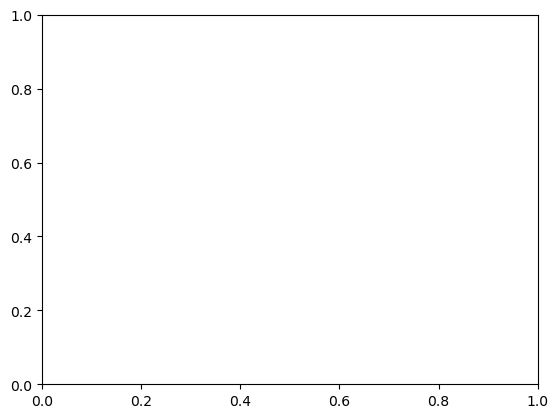

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
%matplotlib inline
ax = plt.axes()
plt.style.use('classic')

4.2242523871736815


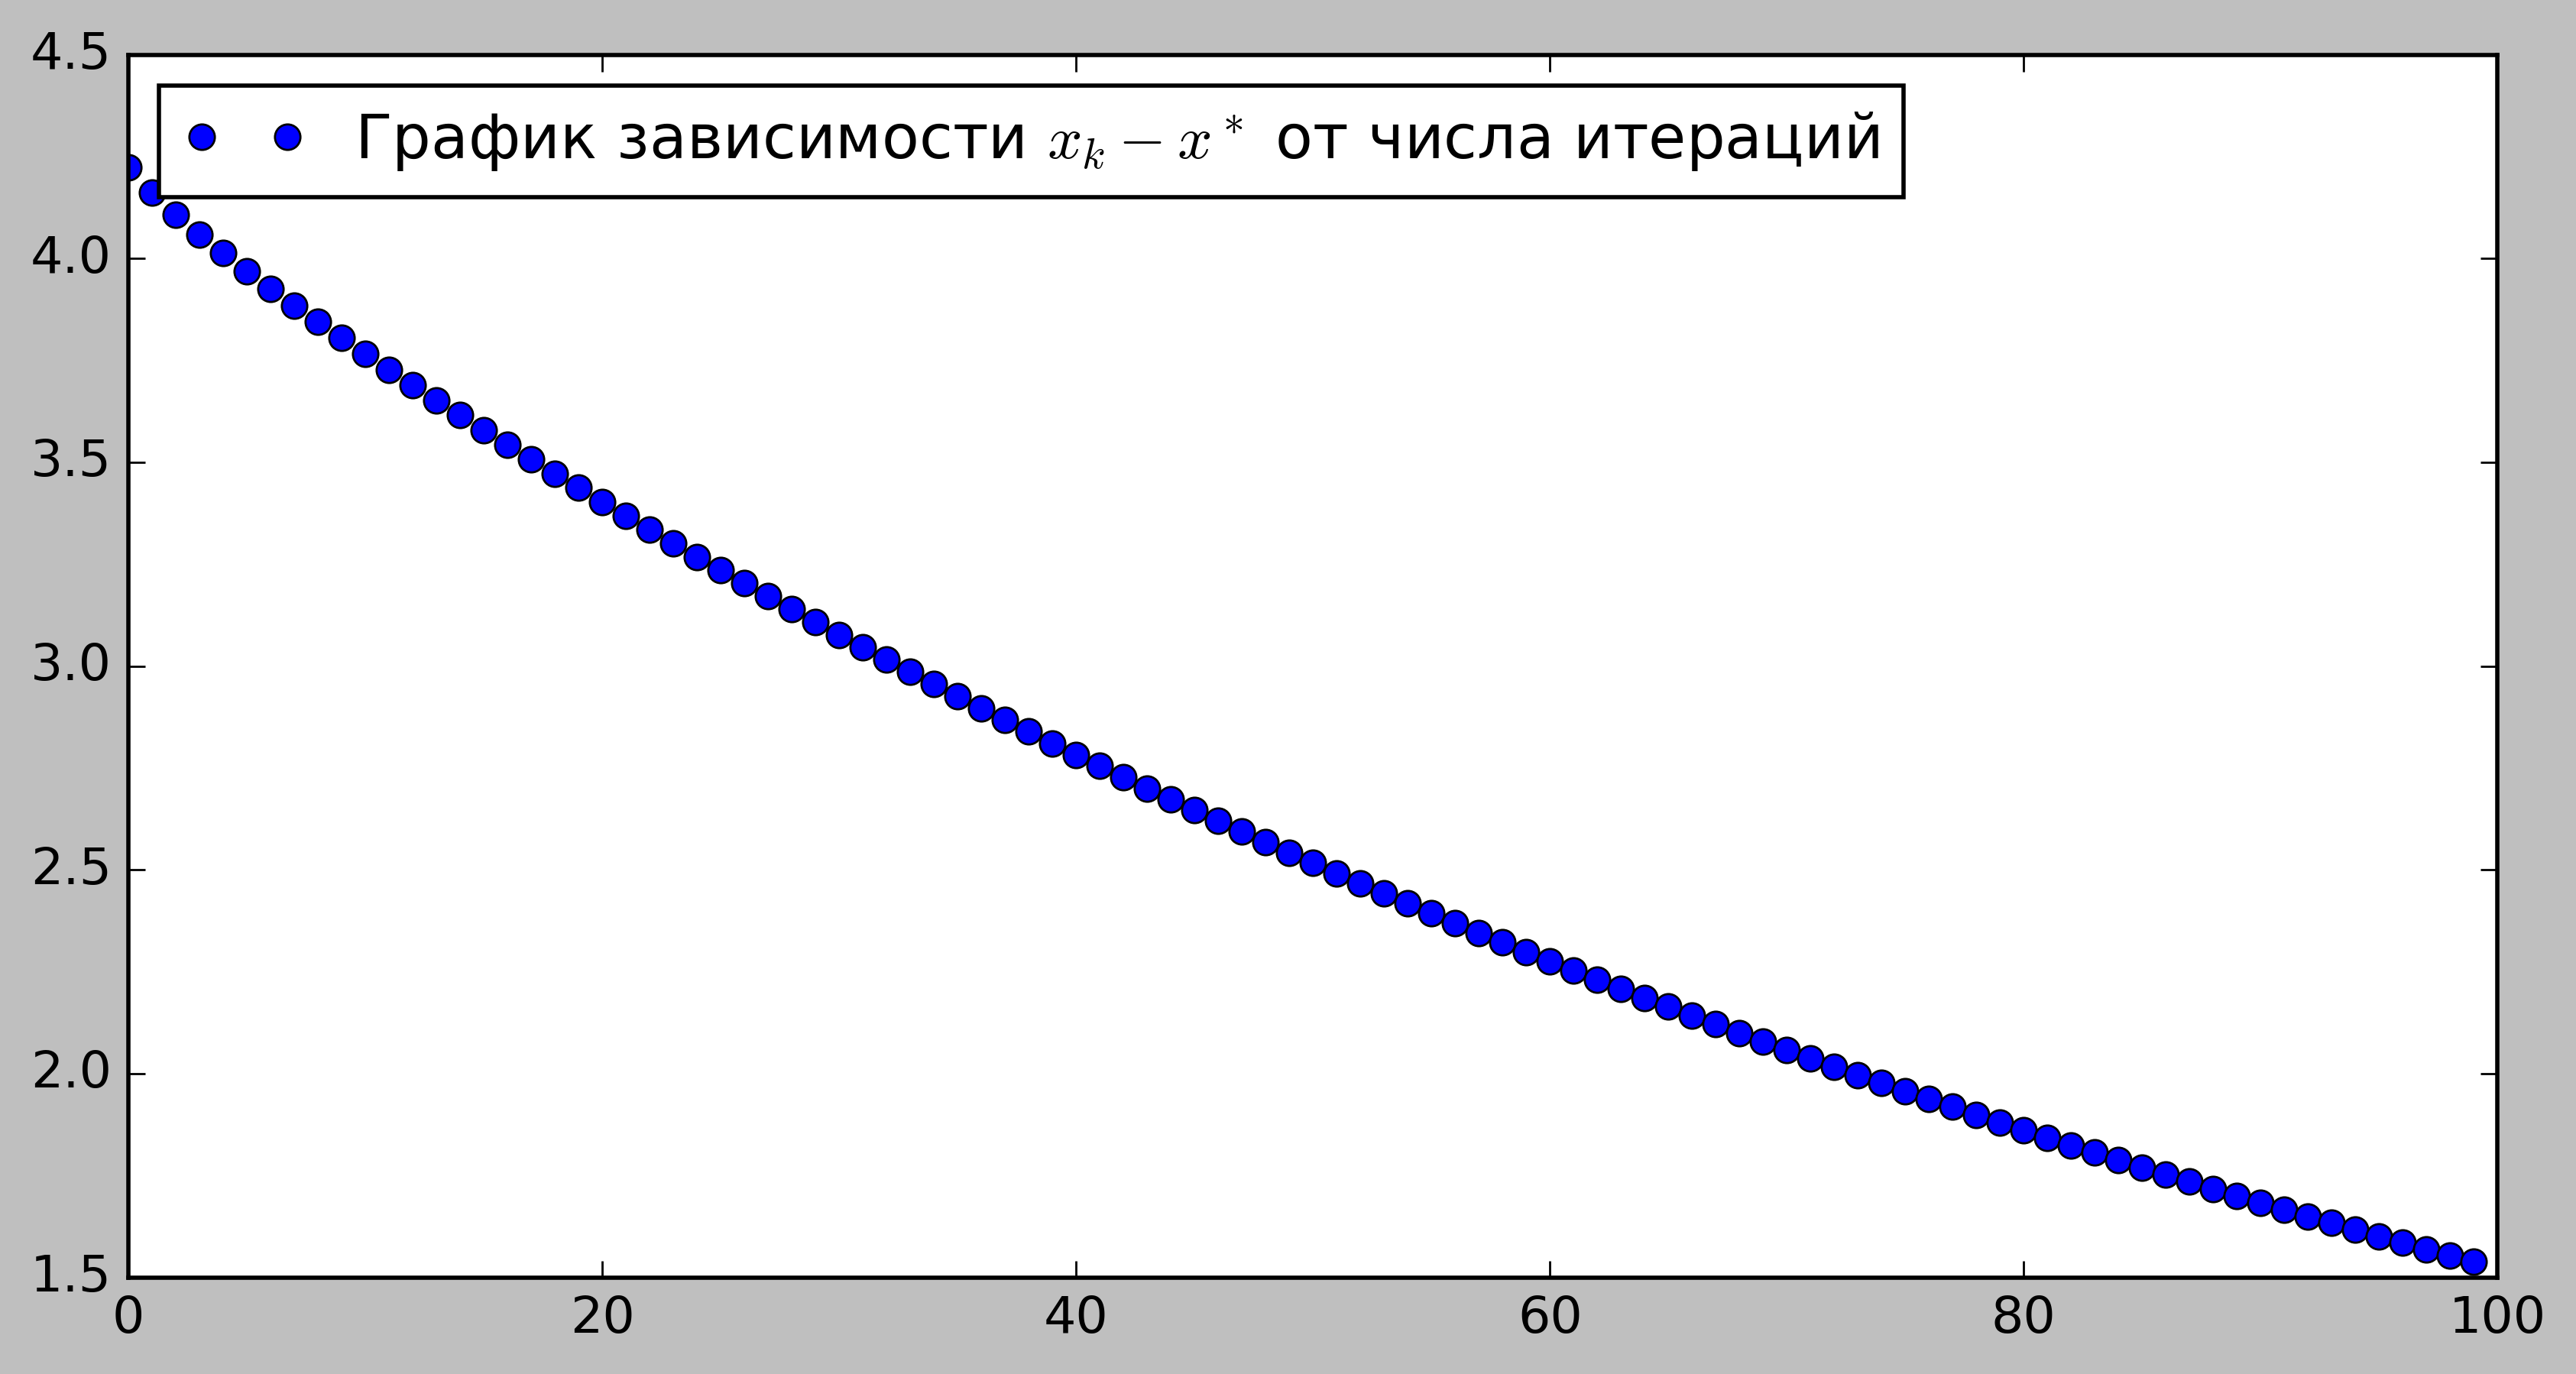

In [6]:
plt.figure(figsize=(10, 5), dpi=400)
N=100
X = np.array(range(N))
Y = np.array([0.0]*N)
x=x0
Y[0]=np.linalg.norm(x0 - x_p)
print(Y[0])
for i in range(1,N):
    x=gradient_descent(x,1, 1/L)
    Y[i] = np.linalg.norm(x - x_p)
    #print(X[i], Y[i])
plt.plot(X, Y, 'o', label="График зависимости $x_k-x^*$ от числа итераций")

plt.legend(loc='upper left')


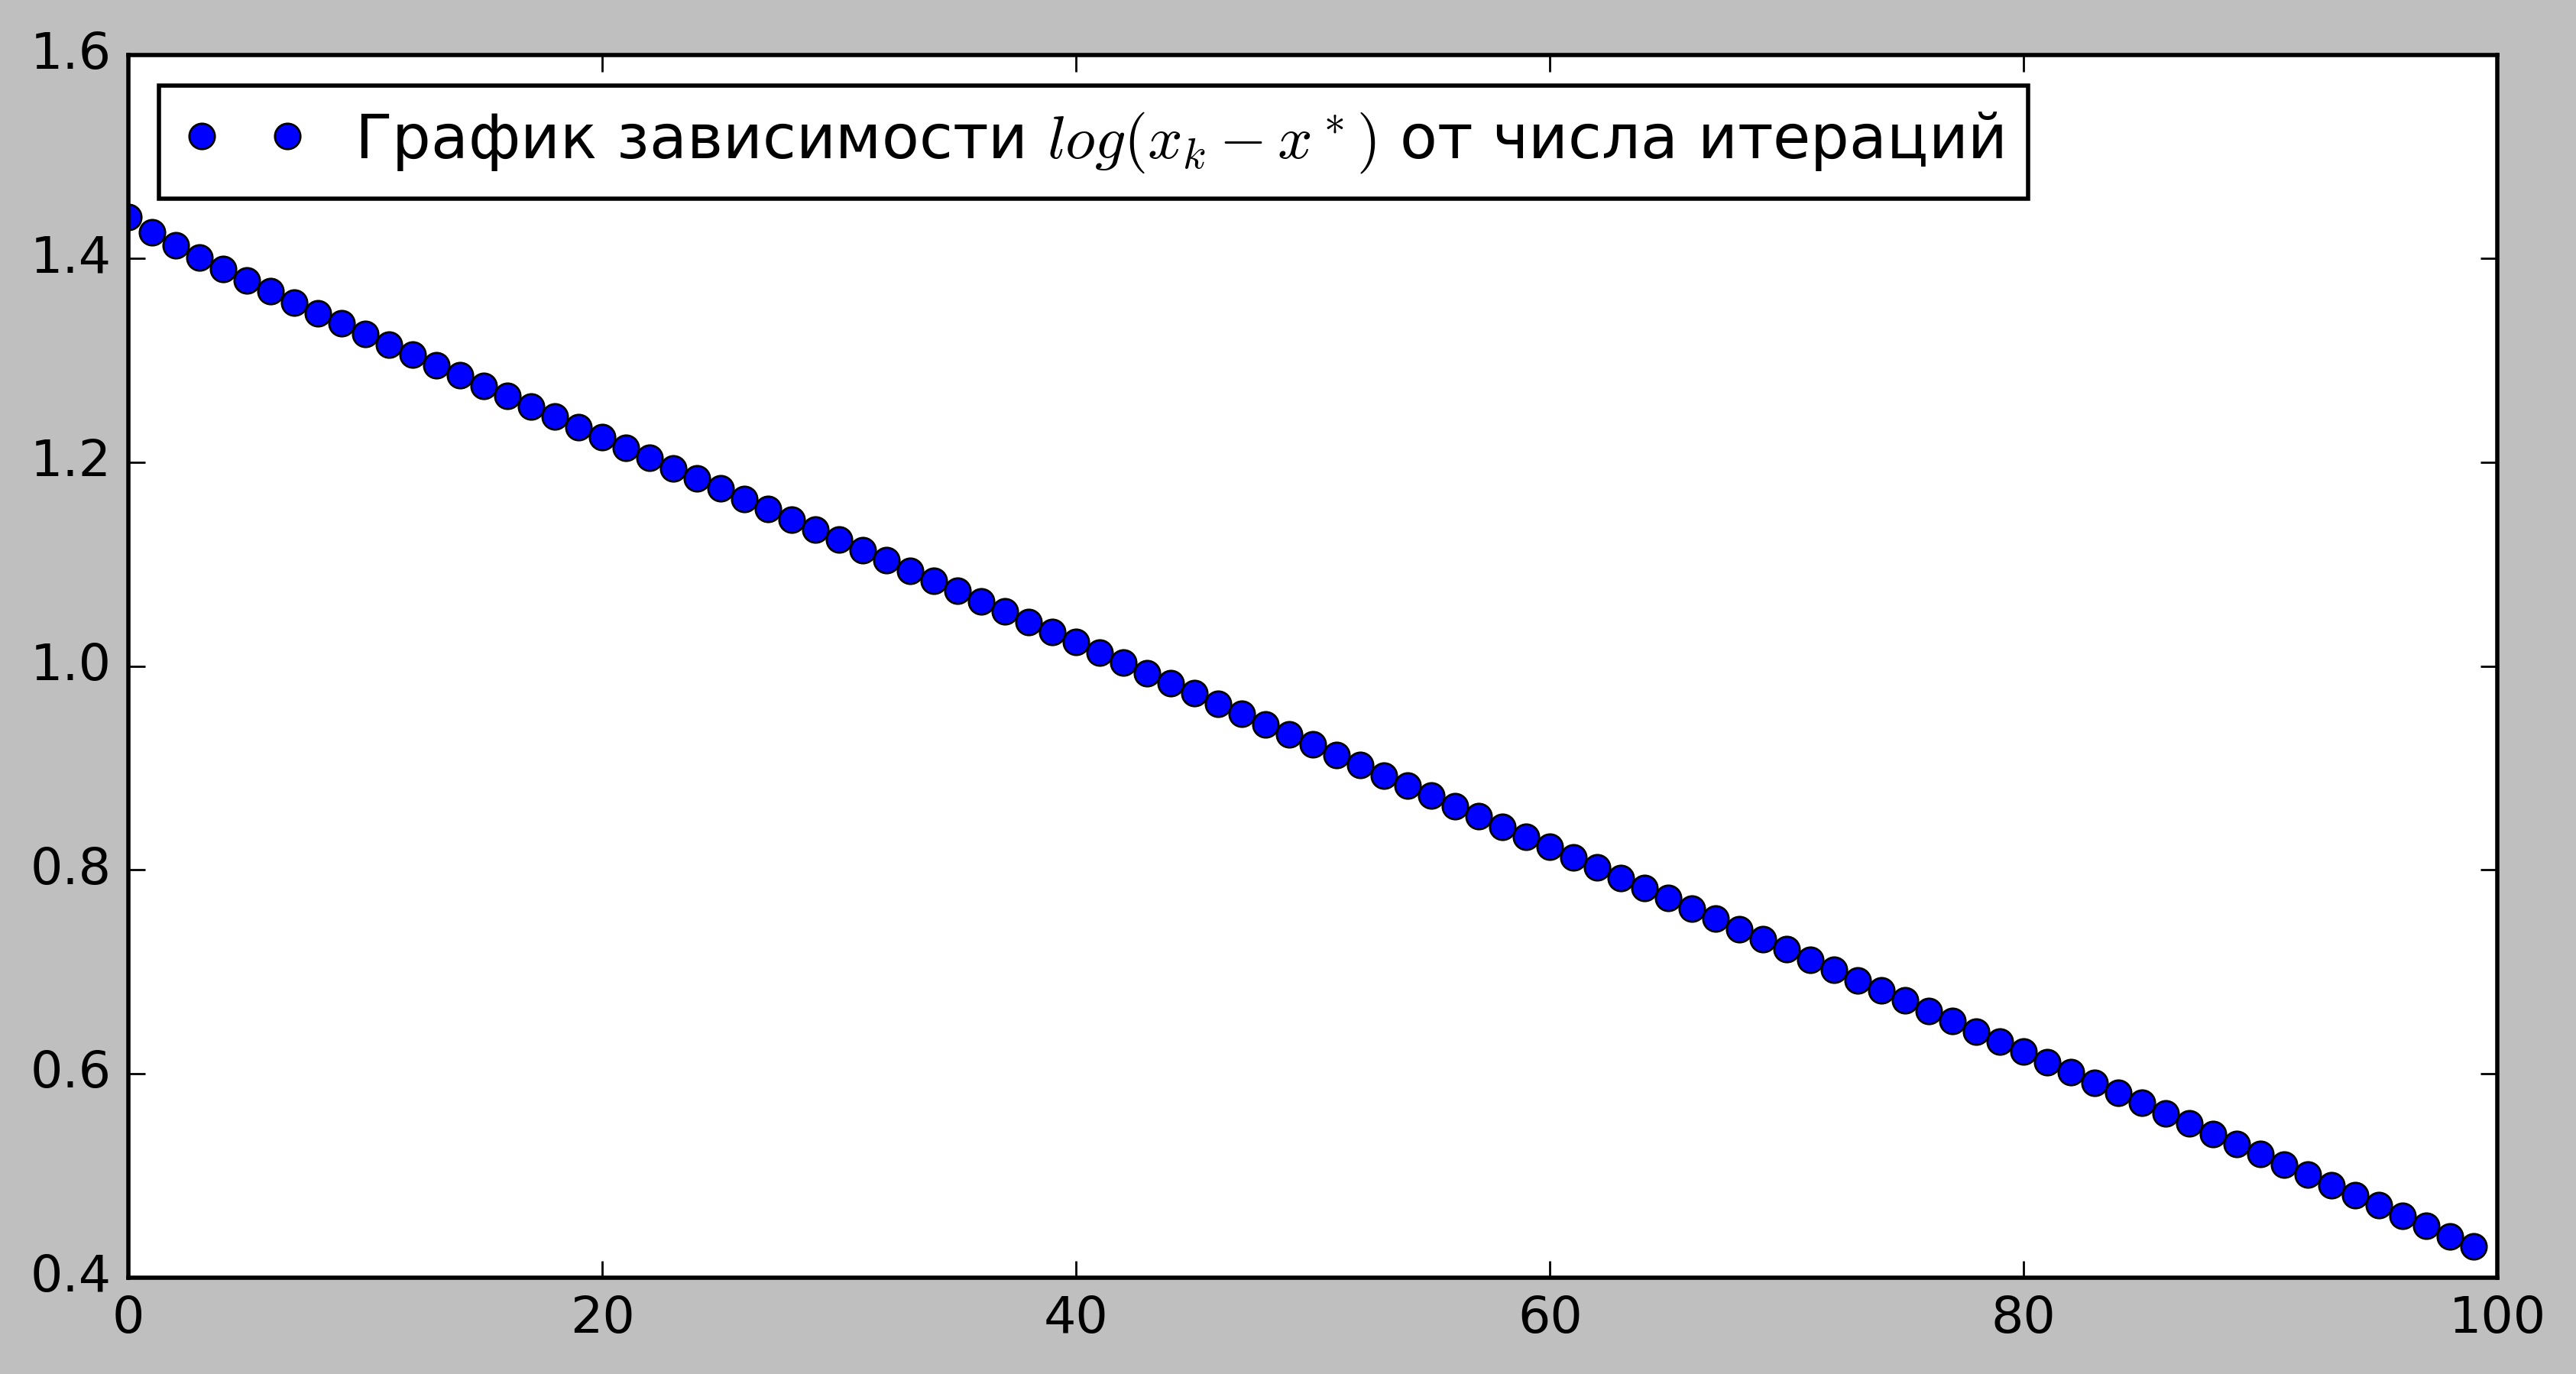

In [7]:
plt.figure(figsize=(10, 5), dpi=400)
logY = np.array([0.0]*N)
for i in range(N):
    logY[i] = math.log(Y[i])
plt.plot(X, logY, 'o', label="График зависимости $log(x_k-x^*)$ от числа итераций")

plt.legend(loc='upper left')


__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

$k=O(\frac{L}{\mu}log\frac{1}{\epsilon})$
Таким образом $log\epsilon \sim k$

Построим график из пункта __(г)__ и прямую.


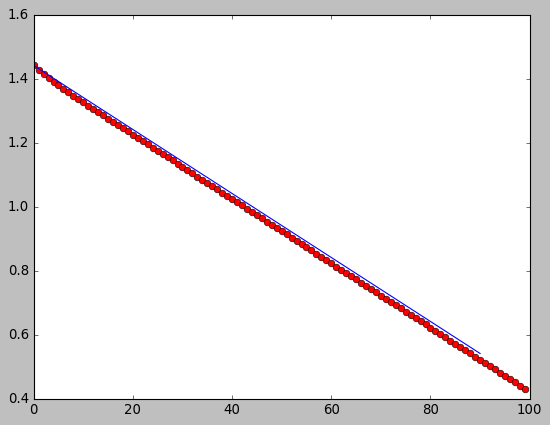

In [8]:
t = np.linspace(0, 90, 1000)
def theor(x, a, b):
    return a*x + b
plt.plot(X, logY, 'or')
plt.plot(t, theor(t, -1 / 100, logY[0]))


__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

4.2242523871736815


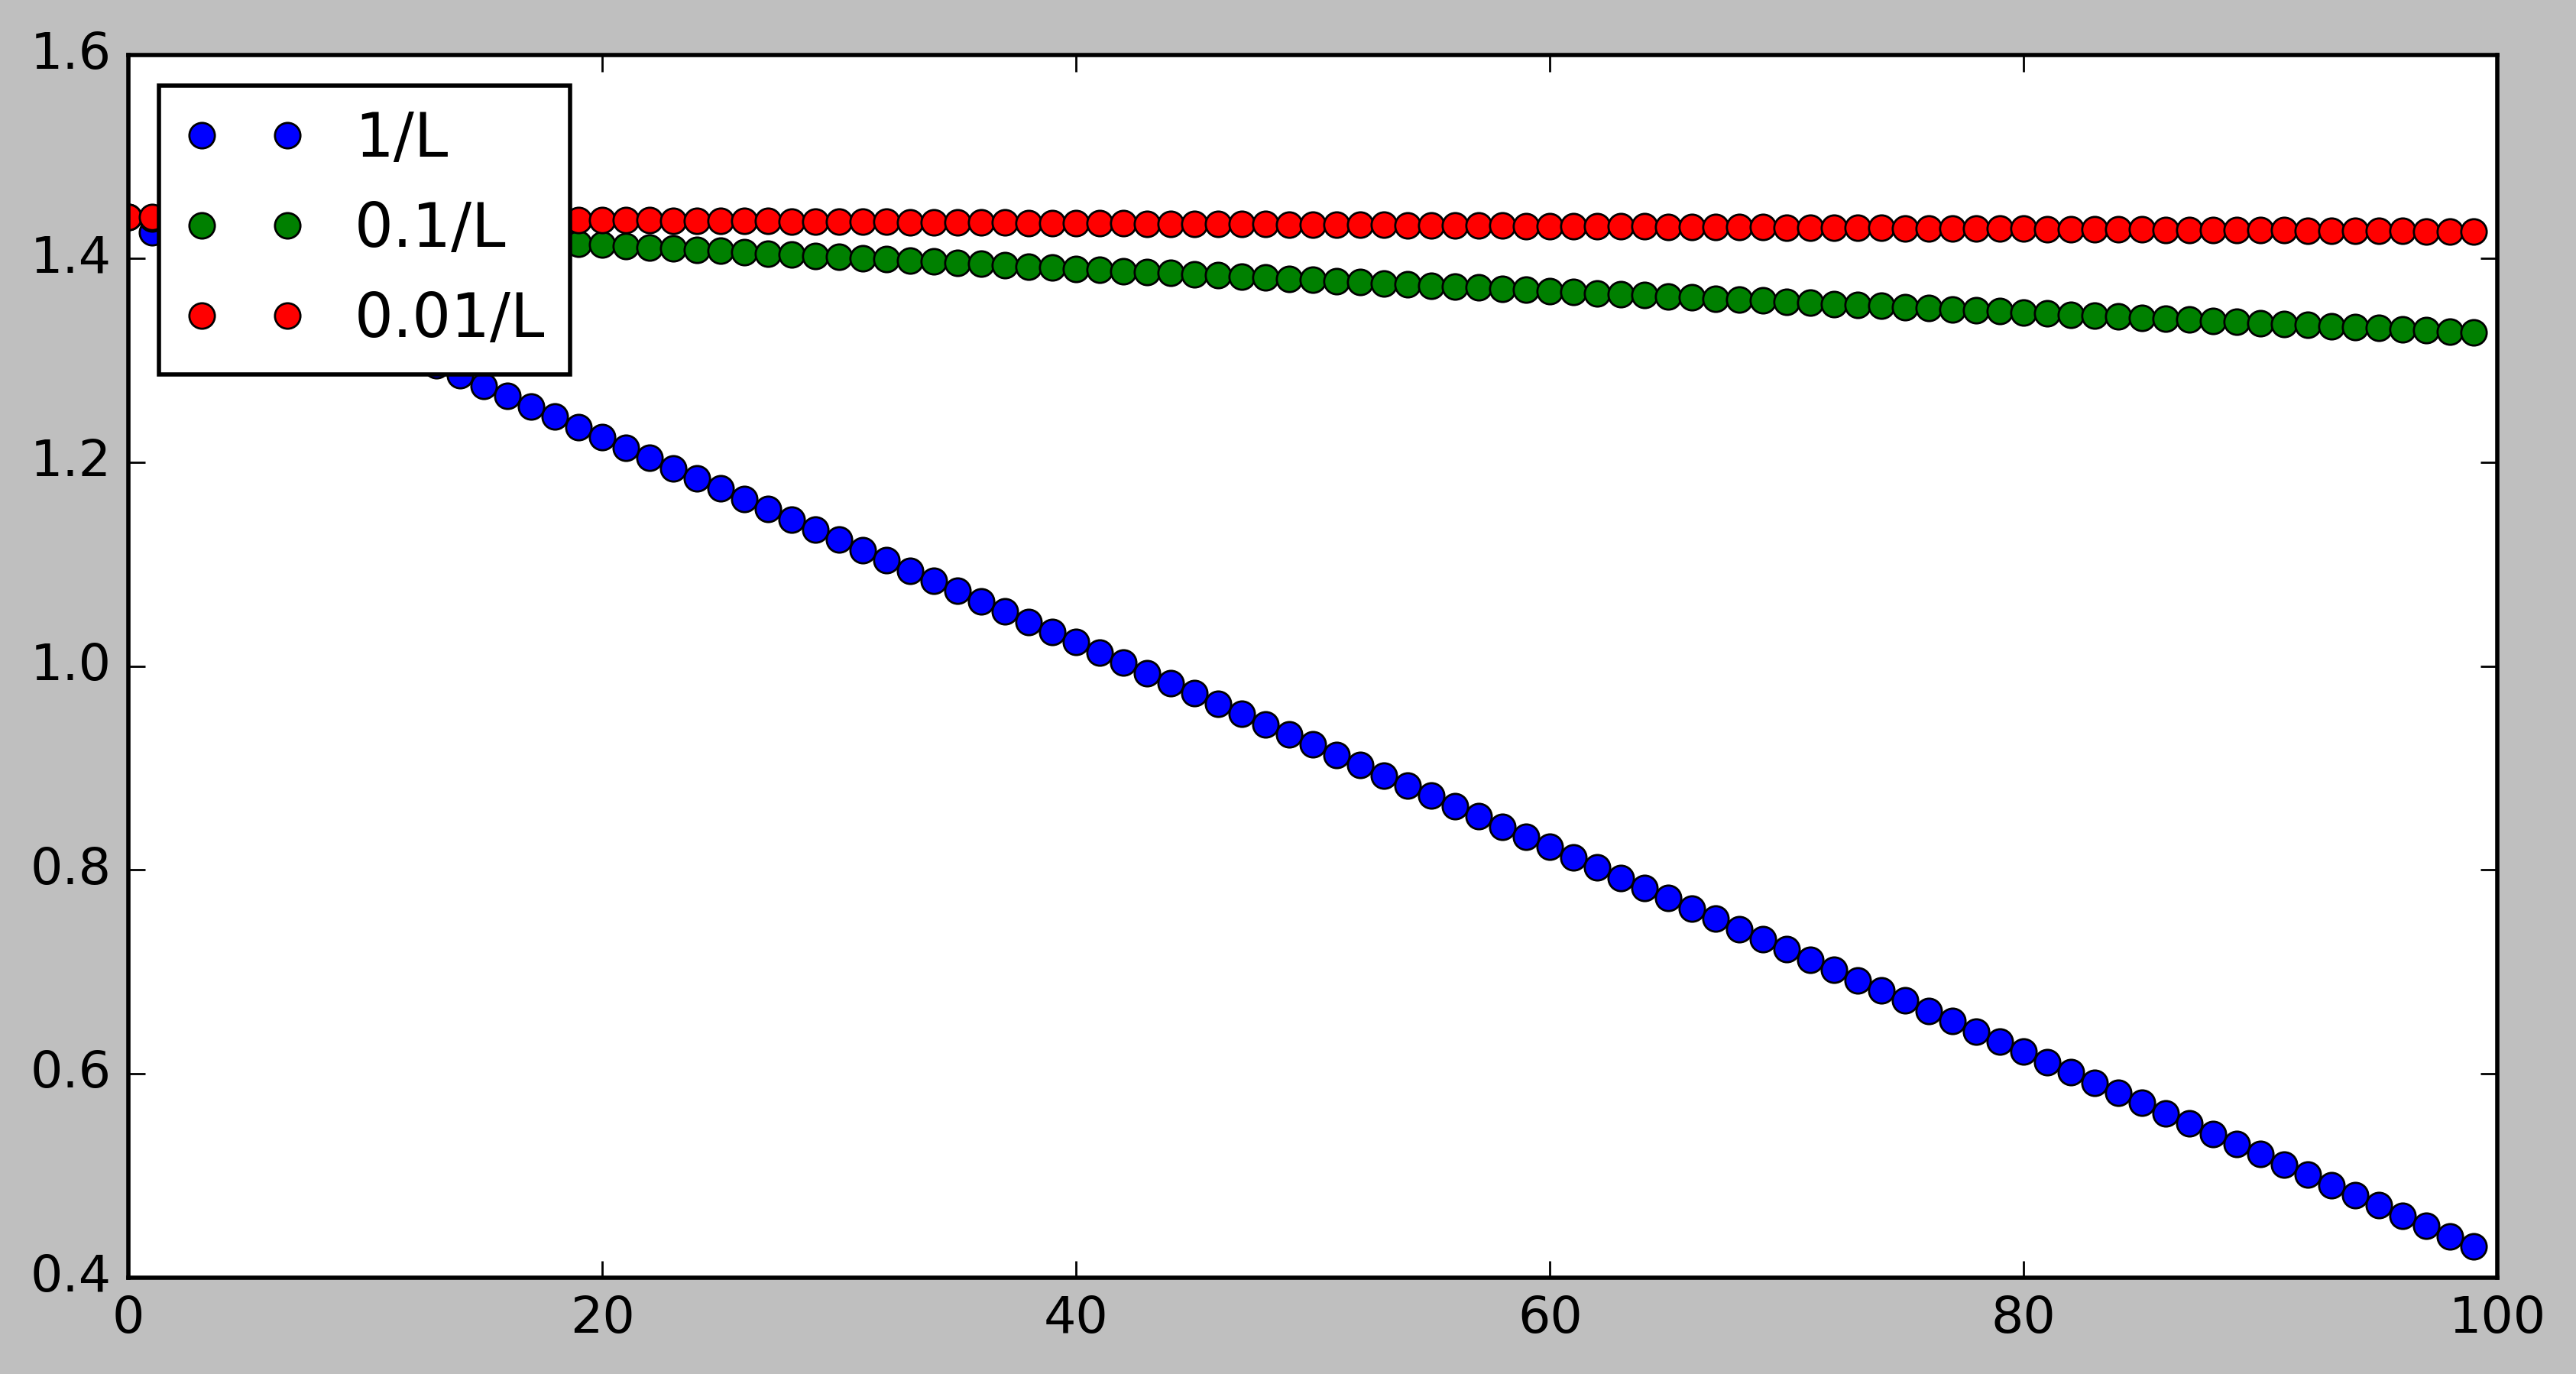

In [9]:
plt.figure(figsize=(10, 5), dpi=400)
N=100
X = np.array(range(N))
Y = np.array([0.0]*N)
x=x0
Y[0]=np.linalg.norm(x0 - x_p)
print(Y[0])
for i in range(1,N):
    x=gradient_descent(x,1, 1/L)
    Y[i] = np.linalg.norm(x - x_p)
    logY[i] = math.log(Y[i])
    #print(X[i], Y[i])
plt.plot(X, logY, 'o', label="1/L")


x=x0
for i in range(1,N):
    x=gradient_descent(x,1, 0.1/L)
    Y[i] = np.linalg.norm(x - x_p)
    logY[i] = math.log(Y[i])
    #print(X[i], Y[i])
plt.plot(X, logY, 'o', label="0.1/L")

x=x0
for i in range(1,N):
    x=gradient_descent(x,1, 0.01/L)
    Y[i] = np.linalg.norm(x - x_p)
    logY[i] = math.log(Y[i])
    #print(X[i], Y[i])
plt.plot(X, logY, 'o', label="0.01/L")
plt.legend(loc='upper left')

#x=x0
#for i in range(1,N):
    #x=gradient_descent(x,1, 5/L)
    #Y[i] = np.linalg.norm(x - x_p)
    #logY[i] = math.log(Y[i])
    #print(X[i], Y[i])
#plt.plot(X, logY, 'o', label="5/L")
plt.legend(loc='upper left')

__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

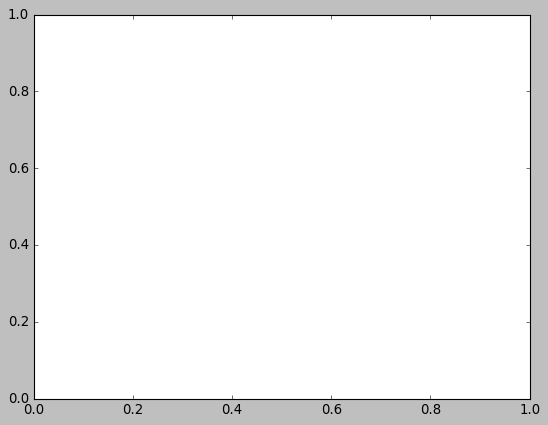

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
%matplotlib inline
ax = plt.axes()
plt.style.use('classic')
d=10
#print(A)
m=0
L=1000
A = generate_matrix(d,m, L)
b = np.array(range(10))
x0=np.array([0,0,0,0,0,0,0,0,0,0])
N=100000



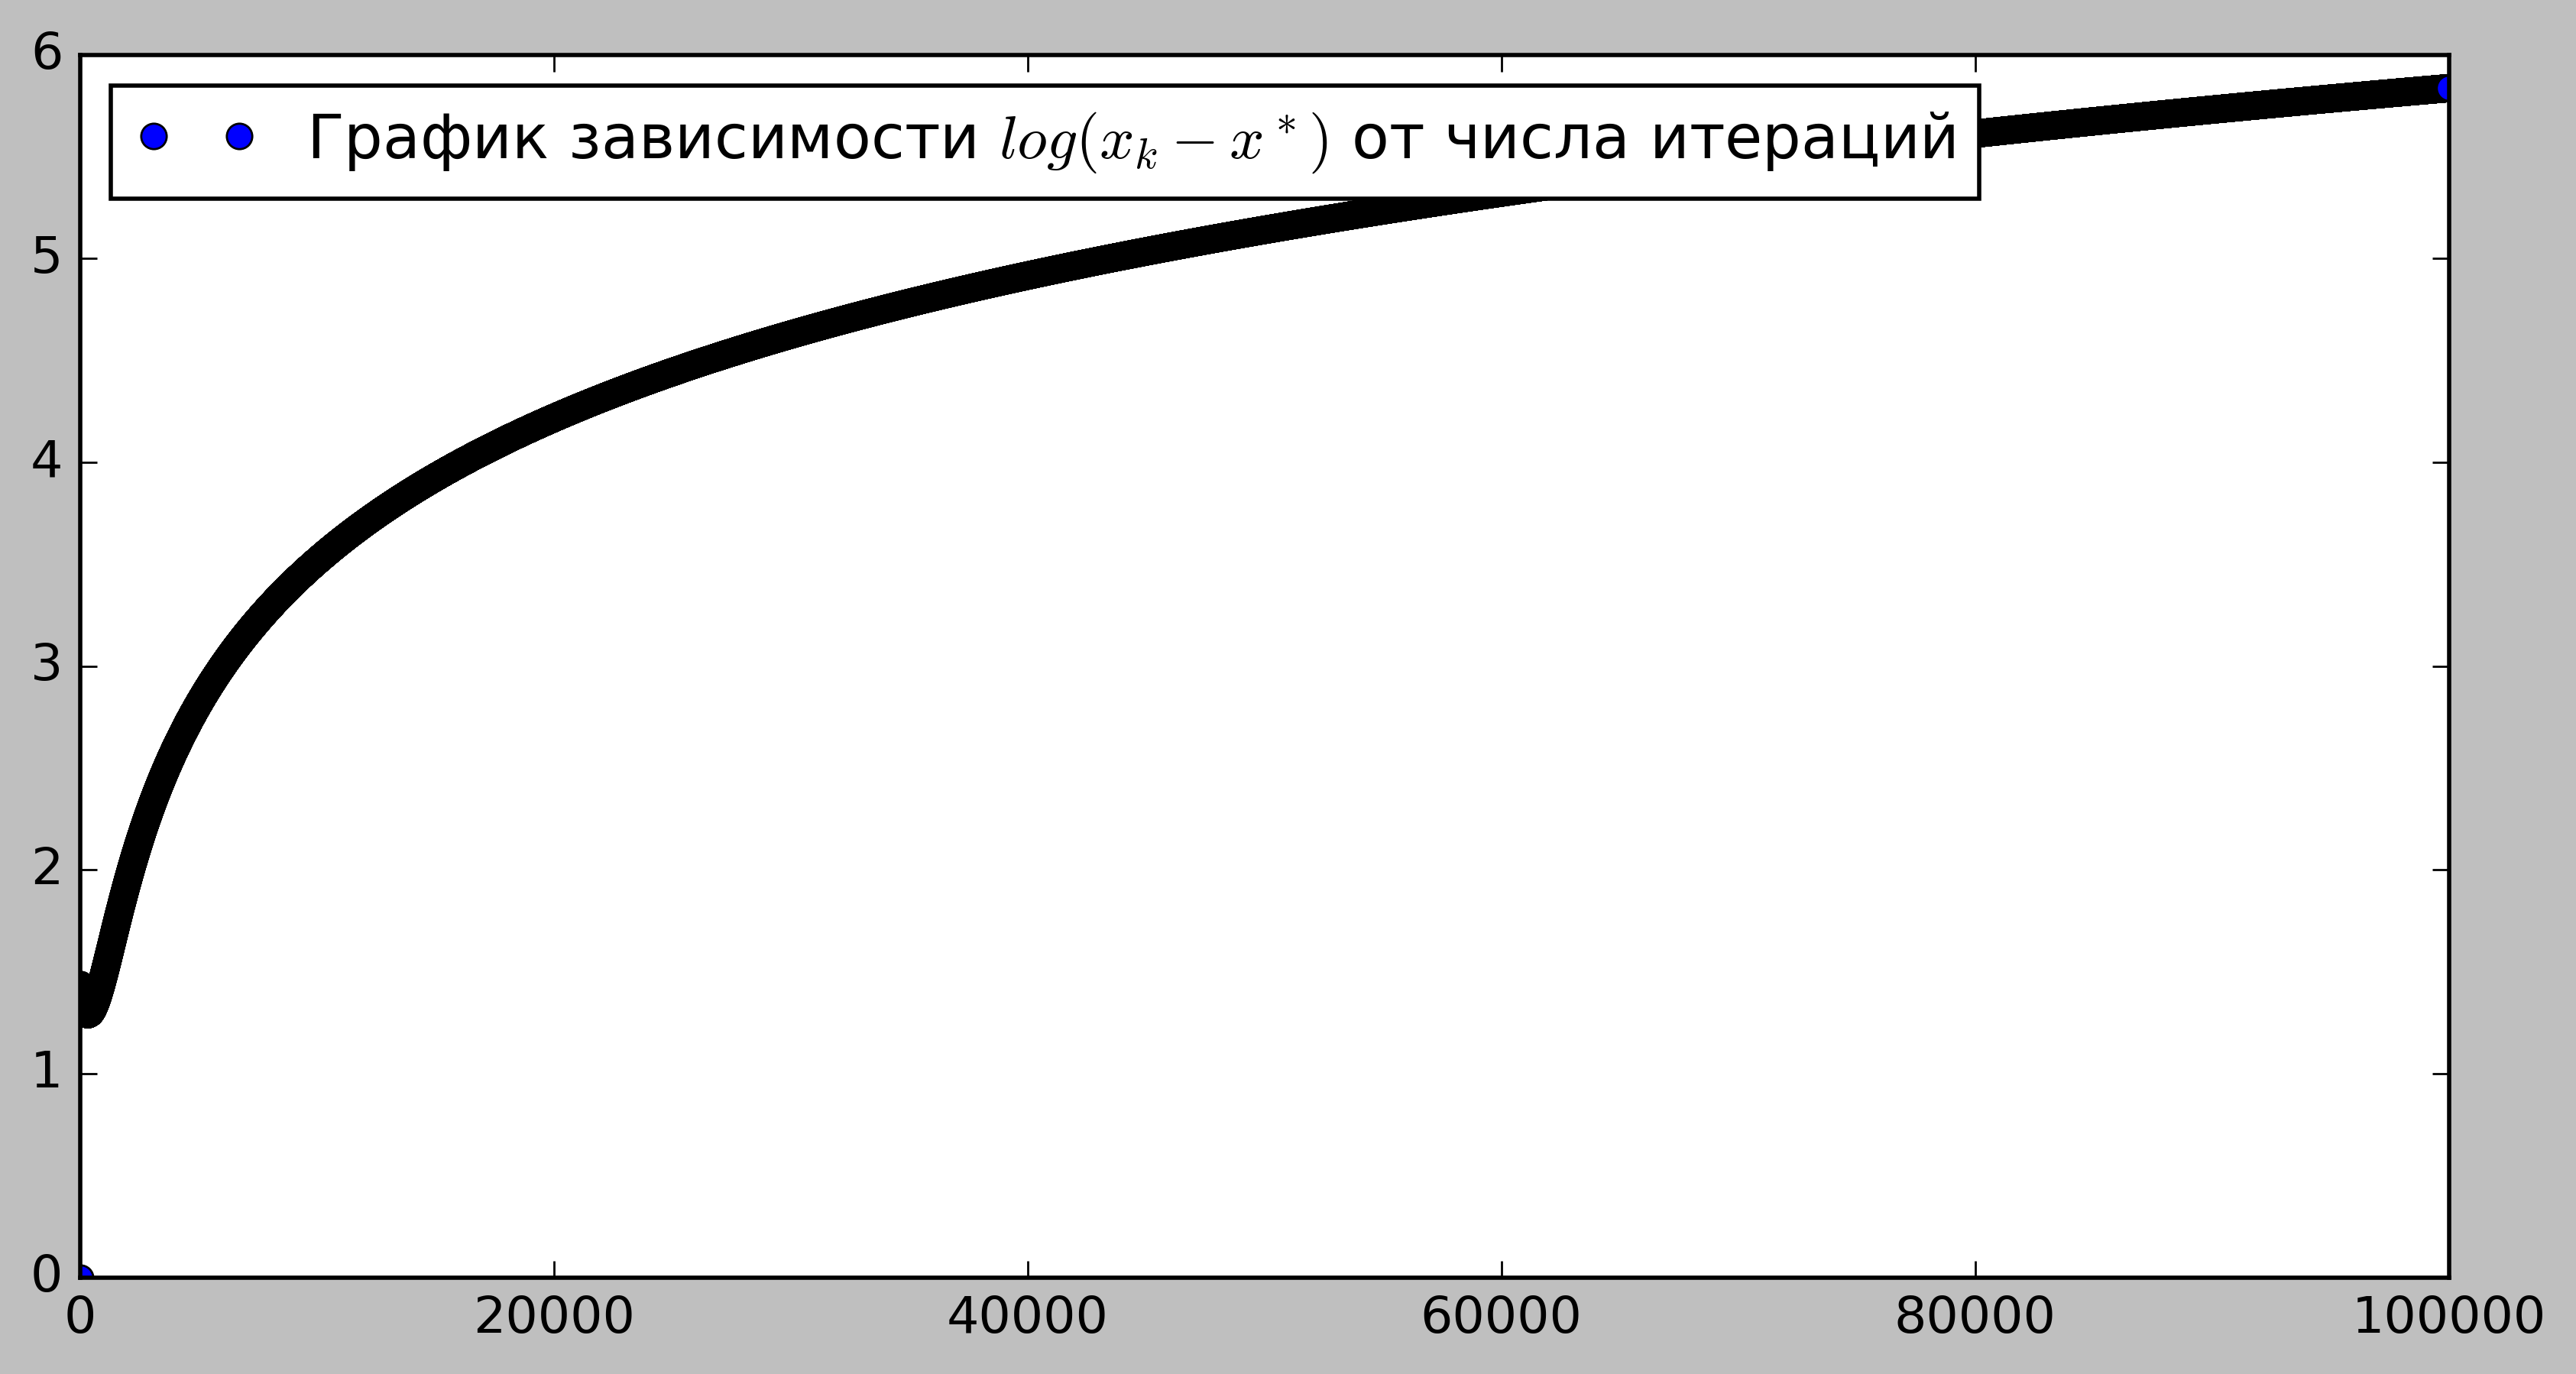

In [11]:
plt.figure(figsize=(10, 5), dpi=400)
X = np.array(range(N))
Y = np.array([0.0]*N)
logY = np.array([0.0]*N)
x=x0
Y[0]=np.linalg.norm(x0 - x_p)
for i in range(1,N):
    x=gradient_descent(x,1, 1/L)
    Y[i] = np.linalg.norm(x - x_p)
    logY[i] = math.log(Y[i])
plt.plot(X, logY, 'o', label="График зависимости $log(x_k-x^*)$ от числа итераций")

plt.legend(loc='upper left')


На графике показано, что $x_k-x^*$ не сходится к 0, а к другому числу. Это лучше отражено на графике в пункте ___(з)___.

Сходимость отсутствует, потому что $\mu=0$ и существует собственное значение, равное 0. 

__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

На картинке график в верхней части картинки

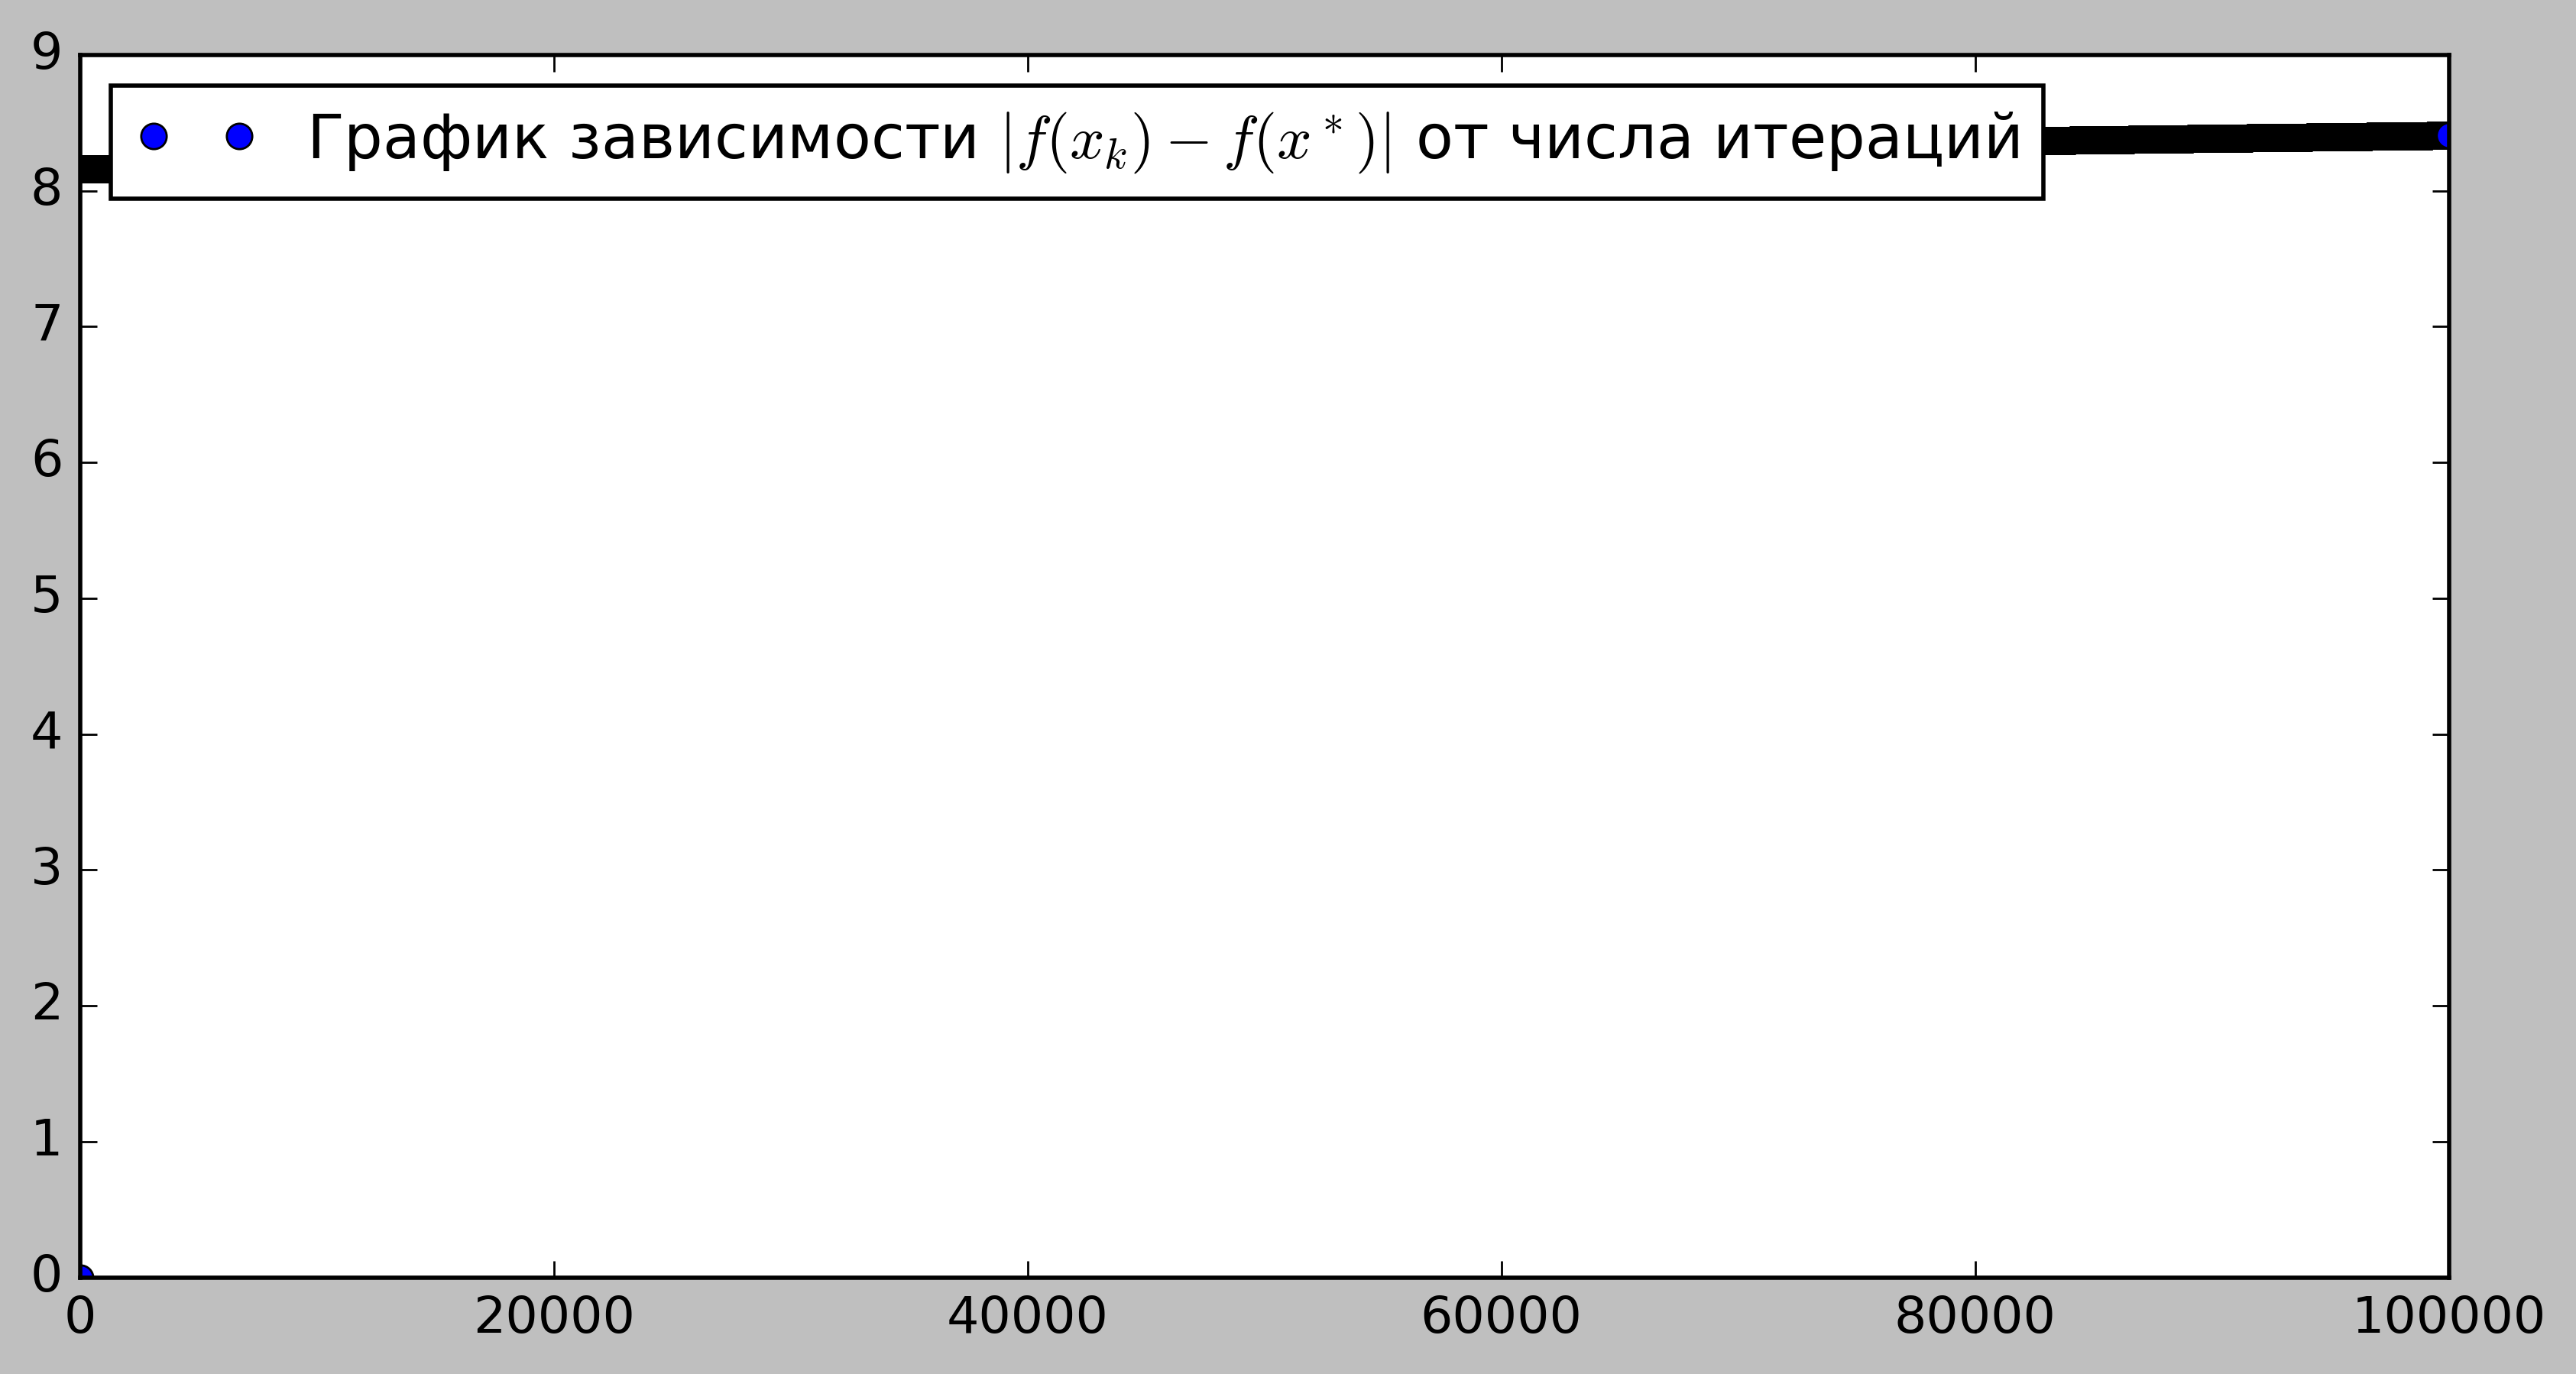

In [12]:
d=10
#print(A)
m=0
L=1000
A = generate_matrix(d,m, L)
b = np.array(range(10))
x0=np.array([0,0,0,0,0,0,0,0,0,0])
N=100000
plt.figure(figsize=(10, 5), dpi=400)
X = np.array(range(N))
Y = np.array([0.0]*N)
logY = np.array([0.0]*N)
x=x0
Y[0]=np.linalg.norm(x0 - x_p)
for i in range(1,N):
    x=gradient_descent(x,1, 1/L)
    Y[i] = np.abs(f(x) - f(x_p))
    logY[i] = math.log(Y[i])
plt.plot(X, logY, 'o', label="График зависимости $|f(x_k)-f(x^*)|$ от числа итераций")

plt.legend(loc='upper left')

Алгоритм сходится куда-то в другое значение. Ожидалось $\lim\limits_{k\rightarrow +\infty}|f(x_k)-f(x^*)|=0$

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

Уменьшающийся с номером итерации шаг